# **Data3406**

> Authur: Ran Sun

### **Does temperature affect people's willingness to walk?**



---
(This notebook is copied from the pre-processed dataset from tpp08.)




> *Importing libraries required for data cleanings and explorations below.*


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> Reading modified data from a csv file.

In [ ]:
M5=pd.read_csv('/content/drive/MyDrive/Modifydata/modifydata.csv')
M5.head() # Check the structure of dataset.
print(M5.dtypes)# Check type of variables.

Date     object
Count     int64
dtype: object


> Convert object type into datetime types


In [ ]:
M5['Date'].replace('-','',regex=True,inplace=True) # replace some unwanted parts of character.
M5.head()
M5['Date'] = pd.to_datetime(M5['Date'], format='%Y%m%d')# convert it into normalized forms.
print(M5.dtypes)

Date     datetime64[ns]
Count             int64
dtype: object


In [ ]:
M5.head()# Check modfied data

,Date,Count
0,2022-01-01,114
1,2022-01-02,8681
2,2022-01-03,5104
3,2022-01-04,8031
4,2022-01-05,7743


> Aggregate by weekly data

In [ ]:
M5_clean=M5 
M5_clean=M5_clean.resample('W-Mon', on='Date').sum() # resample into week
M5_clean.head() # check the weekly step counts.

,Count
Date,
2022-01-03,13899
2022-01-10,27776
2022-01-17,0
2022-01-24,0
2022-01-31,4


> Extracting trend from weekly data

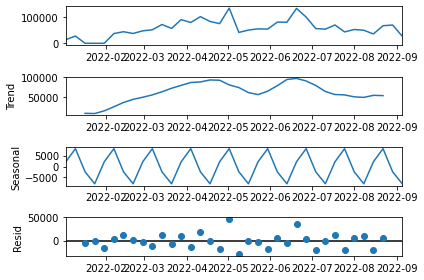

In [ ]:
# Basic time series model: step count(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t), where t = any day
m4=M5_clean
m4['date']=m4.index
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(m4.drop(columns=['date']), model = 'additive',period=4)
fig = decomposition.plot()


(array([738156., 738187., 738215., 738246., 738276., 738307., 738337.,
        738368., 738399.]), <a list of 9 Text major ticklabel objects>)

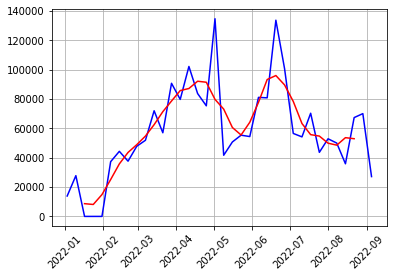

In [ ]:
# plot trend on matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(m4.index, m4['Count'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')
plt.xticks(rotation=45)


#### **Visualization conclusions**

> `Trends`

*   From trend graph above, we could see there is an incaresing trend from week to week until May and July respectively.
















## **Overall conclusions**

We conclude that the trend of step count will start with an increasing tendency in lower temperature date. According to the visualization above indicates March and April are autumn in Australia which would be a better preference for walking. Hence, people would take less step counts in summer like January and more steps in autumn or winter, such as July.